In [2]:
import pandas as pd

# load dataset
df = pd.read_csv("../data/student_data.csv")

# show first 5 rows
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '../data/student_data.csv'

In [3]:
import pandas as pd

df = pd.read_csv("../data/student_data.csv")
df.head()



FileNotFoundError: [Errno 2] No such file or directory: '../data/student_data.csv'

In [4]:
import os
os.getcwd()


'C:\\Users\\allem\\OneDrive\\Desktop\\Student_Performance\\notebooks'

In [5]:
os.listdir("..")



['data', 'notebooks', 'reports']

In [6]:
import pandas as pd

df = pd.read_csv("../data/student_data.csv")
df.head()



,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
def risk_label(grade):
    if grade >= 15:
        return "Safe"
    elif grade >= 10:
        return "At Risk"
    else:
        return "High Risk"

df["risk_level"] = df["G3"].apply(risk_label)


In [8]:
df[["G3", "risk_level"]].head(10)


,G3,risk_level
0,6,High Risk
1,6,High Risk
2,10,At Risk
3,15,Safe
4,10,At Risk
5,15,Safe
6,11,At Risk
7,6,High Risk
8,19,Safe
9,15,Safe


In [9]:
df["risk_level"].value_counts()


risk_level
At Risk      192
High Risk    130
Safe          73
Name: count, dtype: int64

In [10]:
df["risk_level"].value_counts()


risk_level
At Risk      192
High Risk    130
Safe          73
Name: count, dtype: int64

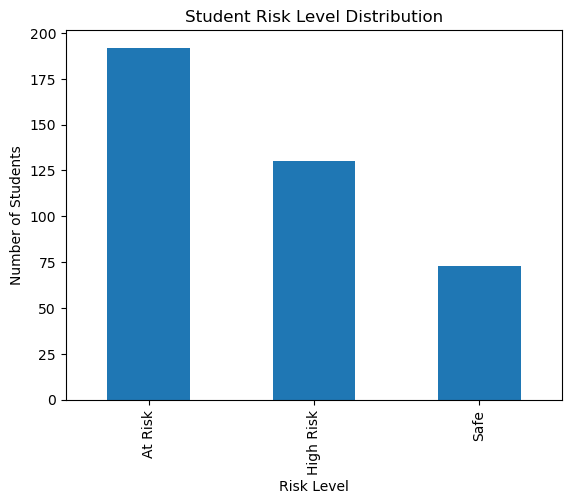

In [11]:
import matplotlib.pyplot as plt

df["risk_level"].value_counts().plot(kind="bar")
plt.title("Student Risk Level Distribution")
plt.xlabel("Risk Level")
plt.ylabel("Number of Students")
plt.show()


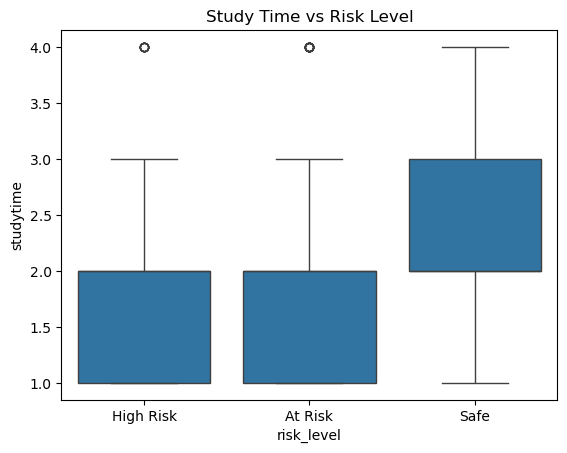

In [12]:
import seaborn as sns

sns.boxplot(x="risk_level", y="studytime", data=df)
plt.title("Study Time vs Risk Level")
plt.show()


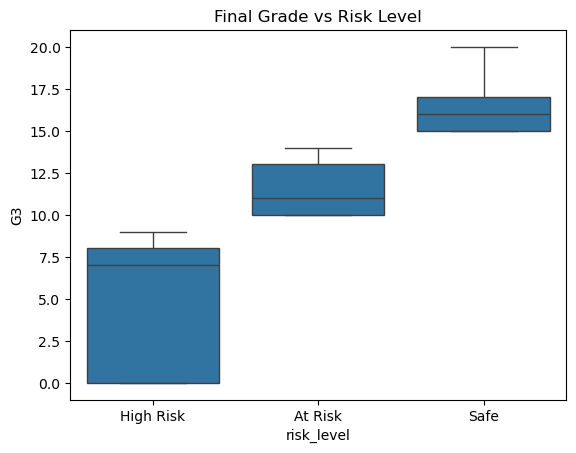

In [13]:
sns.boxplot(x="risk_level", y="G3", data=df)
plt.title("Final Grade vs Risk Level")
plt.show()


In [14]:
# Select features
features = [
    "age", "studytime", "failures",
    "G1", "G2",
    "Medu", "Fedu"
]

X = df[features]
y = df["risk_level"]


In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(le.classes_)


['At Risk' 'High Risk' 'Safe']


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)


In [17]:
from sklearn.ensemble import RandomForestClassifier

# Create model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

# Train model
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [18]:
y_pred = rf_model.predict(X_test)


In [19]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.8734177215189873


In [20]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))


[[27  5  0]
 [ 2 25  0]
 [ 3  0 17]]
              precision    recall  f1-score   support

     At Risk       0.84      0.84      0.84        32
   High Risk       0.83      0.93      0.88        27
        Safe       1.00      0.85      0.92        20

    accuracy                           0.87        79
   macro avg       0.89      0.87      0.88        79
weighted avg       0.88      0.87      0.87        79



In [21]:
import pandas as pd

importance = rf_model.feature_importances_
feature_importance = pd.DataFrame({
    "Feature": features,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

feature_importance


,Feature,Importance
4,G2,0.513918
3,G1,0.255250
0,age,0.064206
5,Medu,0.045852
6,Fedu,0.042156
1,studytime,0.041271
2,failures,0.037347


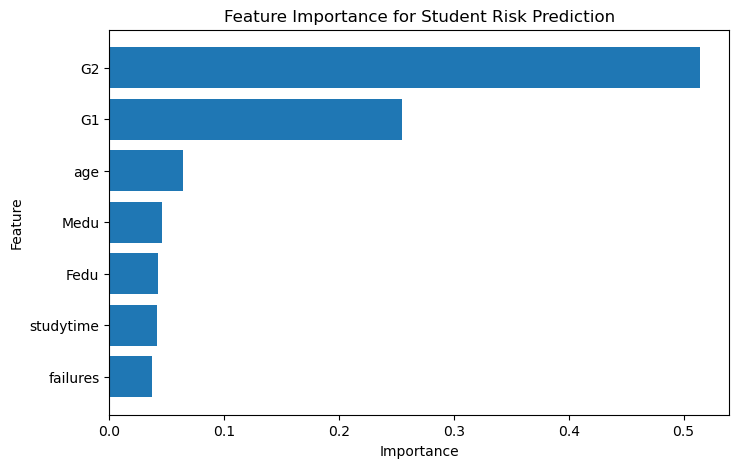

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(feature_importance["Feature"], feature_importance["Importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Student Risk Prediction")
plt.gca().invert_yaxis()
plt.show()
